<h4>use gpu for beter spead</h4>
test di run di pilihan none

In [1]:
# import tensorflow as ml lib
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# get data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-30 03:54:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.1MB/s    in 22s     

2020-05-30 03:55:13 (13.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# create dir
!mkdir -p '../tmp/rockpaperscissors/train'
!mkdir -p '../tmp/rockpaperscissors/val'
!mkdir -p '../tmp/rockpaperscissors/val/paper'
!mkdir -p '../tmp/rockpaperscissors/val/rock'
!mkdir -p '../tmp/rockpaperscissors/val/scissors'

In [5]:
# count file in it
!ls '../tmp/rockpaperscissors'
!find '../tmp/rockpaperscissors/paper' -type f | wc -l
!find '../tmp/rockpaperscissors/rock' -type f | wc -l
!find '../tmp/rockpaperscissors/scissors' -type f | wc -l

paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors	train  val
712
726
750


In [6]:
# split random data paper 712 = 142->valid(20%) 
!ls ../tmp/rockpaperscissors/paper/* | shuf -n 142 | xargs -i mv {} ../tmp/rockpaperscissors/val/paper/
!find '../tmp/rockpaperscissors/val/paper' -type f | wc -l
!mv '../tmp/rockpaperscissors/paper' '../tmp/rockpaperscissors/train/'
!find '../tmp/rockpaperscissors/train/paper' -type f | wc -l

142
570


In [7]:
# split random data rock 726 = 145->valid(20%) 
!ls ../tmp/rockpaperscissors/rock/* | shuf -n 145 | xargs -i mv {} ../tmp/rockpaperscissors/val/rock/
!find '../tmp/rockpaperscissors/val/rock' -type f | wc -l
!mv '../tmp/rockpaperscissors/rock' '../tmp/rockpaperscissors/train/'
!find '../tmp/rockpaperscissors/train/rock' -type f | wc -l

145
581


In [8]:
# split random data scissors 750 = 150->valid(20%) 
!ls ../tmp/rockpaperscissors/scissors/* | shuf -n 150 | xargs -i mv {} ../tmp/rockpaperscissors/val/scissors/
!find '../tmp/rockpaperscissors/val/scissors' -type f | wc -l
!mv '../tmp/rockpaperscissors/scissors' '../tmp/rockpaperscissors/train/'
!find '../tmp/rockpaperscissors/train/scissors' -type f | wc -l

150
600


In [0]:
base_dir = '/tmp/rockpaperscissors'
dir_train = os.path.join(base_dir, 'train')
dir_validation = os.path.join(base_dir, 'val')

In [0]:
# split and save dir into variable
dir_train_paper = os.path.join(dir_train, 'paper')
dir_train_rock = os.path.join(dir_train, 'rock')
dir_train_scissors = os.path.join(dir_train, 'scissors')

dir_validation_paper = os.path.join(dir_validation, 'paper')
dir_validation_rock = os.path.join(dir_validation, 'rock')
dir_validation_scissors = os.path.join(dir_validation, 'scissors')

In [0]:
# use augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=3,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    ) 
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=3,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',

    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    )

In [12]:
# use data generator
train_generator = train_datagen.flow_from_directory(
        dir_train,
        target_size=(150, 150),
        # color_mode = 'grayscale',
        batch_size=10,
        class_mode='categorical'
        )
 
validation_generator = test_datagen.flow_from_directory(
        dir_validation,
        target_size=(150, 150),
        # color_mode = 'grayscale',
        batch_size=10,
        class_mode='categorical'
        )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
# lets see what data lookslike
x_batch, y_batch = next(train_generator)

In [14]:
# data
print(len(x_batch))
print(type(x_batch))
print(x_batch[0])

10
<class 'numpy.ndarray'>
[[[0.13333334 0.4784314  0.14901961]
  [0.1393939  0.48045158 0.15103981]
  [0.14888406 0.48613897 0.15862021]
  ...
  [0.13467051 0.46274513 0.14815815]
  [0.14018783 0.46567804 0.15781838]
  [0.13275926 0.45544374 0.1523671 ]]

 [[0.13333334 0.4784314  0.14901961]
  [0.13938242 0.48044777 0.15103598]
  [0.14887641 0.48613134 0.15860873]
  ...
  [0.13465904 0.46274513 0.14815432]
  [0.14018402 0.46567422 0.15780692]
  [0.13277073 0.45545903 0.15237857]]

 [[0.13365279 0.47875085 0.15051001]
  [0.13904767 0.48135054 0.15313697]
  [0.14734866 0.4870546  0.1604591 ]
  ...
  [0.13205703 0.47138482 0.1521833 ]
  [0.13174835 0.4683168  0.15717608]
  [0.12604666 0.4610778  0.15350792]]

 ...

 [[0.14901961 0.49411768 0.15686275]
  [0.14318714 0.4970339  0.15394652]
  [0.13732617 0.50595367 0.1516815 ]
  ...
  [0.12049414 0.48520005 0.15578827]
  [0.11764707 0.48946553 0.15294118]
  [0.11540339 0.491874   0.15069751]]

 [[0.14901961 0.49411768 0.15686275]
  [0.14320

In [15]:
# predict
print(len(y_batch))
print(type(y_batch))
print(y_batch[0]) #because it use binary we use "categoricalcrossentropy "

10
<class 'numpy.ndarray'>
[0. 1. 0.]


In [0]:
# because labes sotre in numpy array i create function to determine the name
def rockpaperscissors_wordpredict(datainput):
  if datainput[0]==1:
    print('paper')
  elif datainput[1] ==1:
    print('rock')
  elif datainput[2] ==1:
    print('scissors')
  else:
    print('none')

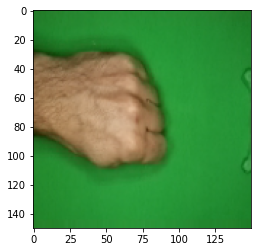

[0. 1. 0.]
rock


In [17]:
# visualisasi data for beter understand of data
import matplotlib.pyplot as plt

for i in range (0,1):
  image = x_batch[i]
  plt.imshow(image)
  plt.show()
  print(y_batch[i])
  rockpaperscissors_wordpredict(y_batch[i]) 
  #if this print name didnt match a ploting, there are problem in labeling

In [0]:
# create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),#softmax for multi catagoric
])

In [0]:
# use optimizer
model.compile(
    # loss='binary_crossentropy', # there are only two label classes (assumed to be 0 and 1)
    loss='categorical_crossentropy', # there are two or more label classes. We expect labels to be provided in a one_hot representation
    # loss='sparse_categorical_crossentropy', # there are two or more label classes. We expect labels to be provided as integers
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
    )

In [0]:
model_callback=[
                tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [21]:
# train data
import time
timestart = time.time()
rockpaperscissorsmodel = model.fit(
    train_generator,
    steps_per_epoch=87, 
    epochs=10, #look like 10 are enought, recomended more for beter accuracy
    # epochs=20, # 20-50 are still ok under 30 min,
    validation_data=validation_generator,
    validation_steps=9,
    callbacks=model_callback,
    verbose=1,
    shuffle=True,
    )
endtime = time.time()
print(f'total train waktu = {(endtime-timestart)/60} m')

Epoch 1/10
87/87 [==============================] - 44s 509ms/step - loss: 0.8402 - accuracy: 0.6023 - val_loss: 0.8401 - val_accuracy: 0.6889
Epoch 2/10
87/87 [==============================] - 44s 500ms/step - loss: 0.3563 - accuracy: 0.8769 - val_loss: 0.3466 - val_accuracy: 0.9000
Epoch 3/10
87/87 [==============================] - 44s 502ms/step - loss: 0.2908 - accuracy: 0.8943 - val_loss: 0.2631 - val_accuracy: 0.9556
Epoch 4/10
87/87 [==============================] - 43s 499ms/step - loss: 0.2393 - accuracy: 0.9175 - val_loss: 0.2355 - val_accuracy: 0.9111
Epoch 5/10
87/87 [==============================] - 44s 502ms/step - loss: 0.1371 - accuracy: 0.9483 - val_loss: 0.0899 - val_accuracy: 0.9667
Epoch 6/10
87/87 [==============================] - 43s 497ms/step - loss: 0.1708 - accuracy: 0.9350 - val_loss: 0.3107 - val_accuracy: 0.9444
Epoch 7/10
87/87 [==============================] - 43s 496ms/step - loss: 0.1455 - accuracy: 0.9559 - val_loss: 0.1439 - val_accuracy: 0.9667

In [22]:
# get model detail summery
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
# check model keys
print(rockpaperscissorsmodel.history.keys())
modal_loss=rockpaperscissorsmodel.history['loss']
modal_accuracy=rockpaperscissorsmodel.history['accuracy']
modal_val_loss=rockpaperscissorsmodel.history['val_loss']
modal_val_accuracy=rockpaperscissorsmodel.history['val_accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.6022988557815552, 0.876887321472168, 0.8942528963088989, 0.9175377488136292, 0.9482758641242981, 0.934959352016449, 0.9558652639389038, 0.9535424113273621, 0.9643678069114685, 0.9547038078308105]
[0.6888889074325562, 0.8999999761581421, 0.9555555582046509, 0.9111111164093018, 0.9666666388511658, 0.9444444179534912, 0.9666666388511658, 0.9444444179534912, 0.9555555582046509, 0.9555555582046509]


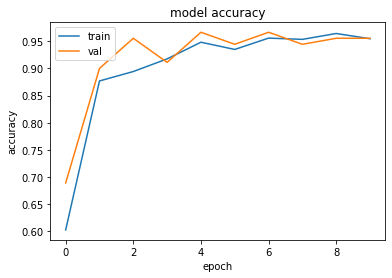

In [24]:
# create accuracy graph
print(modal_accuracy)
print(modal_val_accuracy)

plt.title('model accuracy')
plt.plot(modal_accuracy)
plt.plot(modal_val_accuracy)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[0.8401587605476379, 0.3563271760940552, 0.29075562953948975, 0.23926495015621185, 0.13708335161209106, 0.1708241105079651, 0.14549840986728668, 0.15124021470546722, 0.13295653462409973, 0.14719505608081818]
[0.840071976184845, 0.34663233160972595, 0.2630920112133026, 0.23552873730659485, 0.08989954739809036, 0.3107152581214905, 0.14385809004306793, 0.32222750782966614, 0.09953613579273224, 0.18945609033107758]


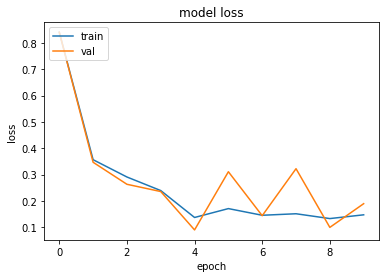

In [25]:
# create loss graph
print(modal_loss)
print(modal_val_loss)

plt.title('model loss')
plt.plot(modal_loss)
plt.plot(modal_val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
# doing beter accuration report (not done coz no time/ need convert data)
# from sklearn.metrics import classification_report, confusion_matrix

# x_val, y_val = next(validation_generator)
# yhat = []

# for i in range(len(x_val)):
#   y_pred = model.predict(x_val[i]) #not working
#   yhat.append(y_pred)

# print (classification_report(y_val, yhat)) #need to convert data from np.array->int

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
[0. 0. 1.]
scissors


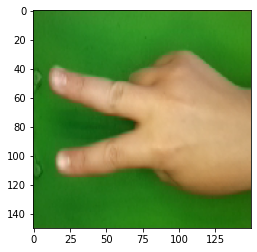

In [28]:
# create input for manual data check
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes[0])
  rockpaperscissors_wordpredict(classes[0])